# Исследование датасета

Изучим датасеты, посмотрим, что находится внутри них

## VPT Contractor Dataset

Откроем датасет '10xx'. Используем колбэки обработки модальностей

In [7]:
from minestudio.data import RawDataModule
from minestudio.data.minecraft.callbacks import ImageKernelCallback, ActionKernelCallback

Откроем датасет, возьмём первый элемент

In [109]:
episode_continuous_batch = True
mine_data = RawDataModule(
    data_params=dict(
        dataset_dirs=['10xx'],
        modal_kernel_callbacks=[
            ImageKernelCallback(frame_width=128, frame_height=128, enable_video_aug=False),
            ActionKernelCallback(enable_prev_action=True, win_bias=1, read_bias=-1),
        ],
        win_len=128,
        split_ratio=0.9,
        shuffle_episodes=True,
    ),
    batch_size=1,
    num_workers=1,
    prefetch_factor=1,
    episode_continuous_batch=episode_continuous_batch,
)

mine_data.setup("fit")
train_loader = mine_data.train_dataloader()
batch = next(iter(train_loader))   

Download Dataset
        Dataset: 10xx
        Base Dir: /tmp/MineStudio
        Total Size: 145.85 GB
        Free Space: 765.93 GB

Fetching 60 files: 100%|██████████| 60/60 [00:00<00:00, 865.70it/s]


[16:02:23] [Kernel] Modal image load 1845 episodes.                                                     ]8;id=912503;file:///usr/local/lib/python3.10/dist-packages/minestudio/data/minecraft/core.py\core.py]8;;\:]8;id=412203;file:///usr/local/lib/python3.10/dist-packages/minestudio/data/minecraft/core.py#264\264]8;;\

[16:02:23] [Kernel] Modal action load 1846 episodes.                                                    ]8;id=483064;file:///usr/local/lib/python3.10/dist-packages/minestudio/data/minecraft/core.py\core.py]8;;\:]8;id=633533;file:///usr/local/lib/python3.10/dist-packages/minestudio/data/minecraft/core.py#264\264]8;;\

[16:02:23] [Kernel] episodes: 1841, frames: 18588896.                                                   ]8;id=497401;file:///usr/local/lib/python3.10/dist-packages/minestudio/data/minecraft/core.py\core.py]8;;\:]8;id=431065;file:///usr/local/lib/python3.10/dist-packages/minestudio/data/minecraft/core.py#277\277]8;;\

[Raw Dataset] Shuffling episodes with seed 0.

Download Dataset
        Dataset: 10xx
        Base Dir: /tmp/MineStudio
        Total Size: 145.85 GB
        Free Space: 765.93 GB

Fetching 60 files: 100%|██████████| 60/60 [00:00<00:00, 720.95it/s]


[16:02:36] [Kernel] Modal image load 1845 episodes.                                                     ]8;id=912503;file:///usr/local/lib/python3.10/dist-packages/minestudio/data/minecraft/core.py\core.py]8;;\:]8;id=412203;file:///usr/local/lib/python3.10/dist-packages/minestudio/data/minecraft/core.py#264\264]8;;\

[16:02:36] [Kernel] Modal action load 1846 episodes.                                                    ]8;id=483064;file:///usr/local/lib/python3.10/dist-packages/minestudio/data/minecraft/core.py\core.py]8;;\:]8;id=633533;file:///usr/local/lib/python3.10/dist-packages/minestudio/data/minecraft/core.py#264\264]8;;\

[16:02:36] [Kernel] episodes: 1841, frames: 18588896.                                                   ]8;id=497401;file:///usr/local/lib/python3.10/dist-packages/minestudio/data/minecraft/core.py\core.py]8;;\:]8;id=431065;file:///usr/local/lib/python3.10/dist-packages/minestudio/data/minecraft/core.py#277\277]8;;\

[Raw Dataset] Shuffling episodes with seed 0.

Посмотрим на имеющиеся ключи

In [110]:
print(type(batch))
print(batch.keys())
for k, v in batch.items():
    print(k, getattr(v, "shape", type(v)))

<class 'dict'>
dict_keys(['image', 'image_mask', 'action_mask', 'env_action', 'env_prev_action', 'agent_action', 'agent_prev_action', 'mask', 'text', 'timestamp', 'episode', 'progress'])
image torch.Size([1, 128, 128, 128, 3])
image_mask torch.Size([1, 128])
action_mask torch.Size([1, 128])
env_action <class 'dict'>
env_prev_action <class 'dict'>
agent_action <class 'dict'>
agent_prev_action <class 'dict'>
mask torch.Size([1, 128])
text <class 'list'>
timestamp torch.Size([1, 128])
episode <class 'list'>
progress <class 'list'>


Рассмотрим каждый из ключей

### Изображения

Мы создали датасет по такому принципу, что у нас загружается последовательность длинной ```win_len```, в нашем случае это 128 элементов. Изображение RGB размера 128х128 (размер указан в создании датасета)

In [111]:
import matplotlib.pyplot as plt
import torch

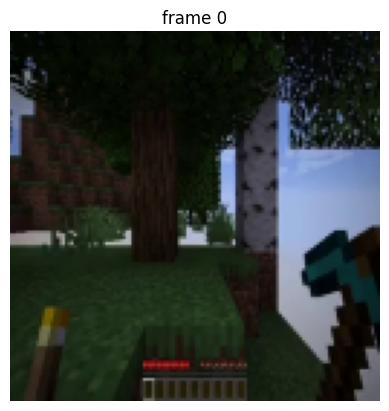

In [112]:
images = batch["image"]  # (1, T, H, W, C)
images = images[0]       # (T, H, W, C)

# посмотрим на первый кадр
frame_num = 0
frame = image[frame_num].cpu().numpy()
plt.figure()
plt.imshow(frame)
plt.title(f"frame {frame_num}")
plt.axis("off")
plt.show()

Посмотрим на ```image_mask```

In [113]:
#исходная маска размера (B, T)
img_mask = batch['image_mask'][0]
img_mask = img_mask.cpu().numpy()
print(img_mask)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Судя по всему это маска валидности кадра, если элементов не хватило под длину временного окна, то мы бы дополняли её какими-то изображениями (скорее всего пустыми), такие изображения будет некорректно использовать при обработке лосса или внимания. Аналогичная маска присутствует и для действий.

In [114]:
#исходная маска размера (B, T)
action_mask = batch['action_mask'][0]
action_mask = action_mask.cpu().numpy()
print(action_mask)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Действия

Для него есть два ключа: ```'env_action'```, ```'env_prev_action'```. Это у нас словари

In [115]:
env_action = batch['env_action']
print(env_action.keys())

dict_keys(['back', 'drop', 'forward', 'hotbar.1', 'hotbar.2', 'hotbar.3', 'hotbar.4', 'hotbar.5', 'hotbar.6', 'hotbar.7', 'hotbar.8', 'hotbar.9', 'inventory', 'jump', 'left', 'right', 'sneak', 'sprint', 'camera', 'attack', 'use'])


In [116]:
print(env_action['back'].shape) # (B, T)

torch.Size([1, 128])


То есть это словарь по всем возможным действиям, тут хранится информация о том, какое действие было отправлено в среду в момент t. Тогда env_prev_action это то, что было сделано в предыдущий момент времени

In [117]:
print('Текущее действие: ', env_action['forward'])
print('Предыдущее действие: ', batch['env_prev_action']['forward'])

Текущее действие:  tensor([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])
Предыдущее действие:  tensor([[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])


Также у нас имеются 'agent_action', это представление действий в том виде, в котором их обрабатывает агент, а действия окружения это в каком виде они подаются в симуляцию

In [118]:
agent_action = batch['agent_action']
print(agent_action.keys())
print(agent_action['buttons'].shape)

dict_keys(['buttons', 'camera'])
torch.Size([1, 128, 1])


In [119]:
print(agent_action['buttons'])

tensor([[[  2],
         [288],
         [288],
         [288],
         [288],
         [288],
         [288],
         [288],
         [289],
         [289],
         [289],
         [291],
         [291],
         [291],
         [289],
         [289],
         [289],
         [289],
         [289],
         [385],
         [384],
         [384],
         [384],
         [192],
         [192],
         [192],
         [192],
         [192],
         [192],
         [ 96],
         [ 96],
         [ 96],
         [ 96],
         [ 96],
         [ 96],
         [ 96],
         [ 96],
         [ 96],
         [288],
         [288],
         [288],
         [288],
         [  1],
         [  1],
         [  1],
         [  1],
         [  1],
         [  1],
         [  5],
         [  5],
         [  5],
         [  5],
         [  5],
         [  5],
         [  4],
         [  4],
         [  4],
         [  4],
         [  4],
         [  4],
         [  4],
         [  4],
        

Это у нас тензор размера (B, T, 1), в котором сочетания действий закодированы идентификаторами. В коде фреймворка есть методы для перевода действий из агента в среду и наоборот: ```agent_action_to_env_action``` и ```env_action_to_agent_action```

In [120]:
print(agent_action['camera'].shape) #(B,T,1)
print(agent_action['camera'])

torch.Size([1, 128, 1])
tensor([[[60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [78],
         [88],
         [77],
         [66],
         [88],
         [77],
         [77],
         [69],
         [51],
         [54],
         [65],
         [63],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [99],
         [77],
         [88],
         [68],
         [57],
         [56],
         [56],
         [62],
         [52],
         [63],
         [40],
         [47],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [60],
         [59],
         [79],
 

### Маска

In [121]:
mask = batch['mask']
print(mask.shape) # (B,T)

torch.Size([1, 128])


In [122]:
print(mask)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]], dtype=torch.uint8)


По идее эта маска валидности шага t в целом, то есть если у нас валидный кадр, но нет валидного действия, то эта маска покажет 0.

### Текст

In [123]:
text = batch['text']
print(len(text)) # (B)
print(text)

1
['raw']


Похоже на служебную метку, в каком режиме загрузился датасет

### Временная метка

In [124]:
tmstmp = batch['timestamp']
print(tmstmp.shape) # (B,T)
print(tmstmp)

torch.Size([1, 128])
tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127]])


Просто номер каждого шага

### Эпизод

In [125]:
episode = batch['episode']
print(len(episode)) # (B)
print(episode)

1
['cheeky-cornflower-setter-527e9fca1a87-20220416-134005']


Похоже на идентификатор эпизода, который нам попался

### Прогресс

In [126]:
progress = batch['progress']
print(len(progress)) # (B)
print(progress)

1
['0/85']


In [127]:
for i, b in zip(range(5), train_loader):
    print(b["progress"])

['0/85']
['1/85']
['2/85']
['3/85']
['4/85']


То есть наш эпизод был разделён на 85 фрагментов

### Сегментация

В целом сверху имеется основная информация для обучения модели, но в датасете также присутствует информация по поводу сегментации, однако возможно в новой версии фреймворка эта информация не поддерживается (установлена последняя версия 1.1.4, а в readme сказано, что датасет поддерживает не более 1.0.6). Но и вряд ли информаци по сегментации нам пригодится